In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data=pd.read_csv("Midsem_LinearR.csv")

In [5]:
data.head()

,x1,x2,x3,x4,x5,y
0,3,3,3,3,0,0.787
1,8,30,8,8,0,0.293
2,3,6,6,6,0,1.710
3,4,4,4,12,0,0.203
4,8,7,6,5,0,0.806


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25 non-null     int64  
 1   x2      25 non-null     int64  
 2   x3      25 non-null     int64  
 3   x4      25 non-null     int64  
 4   x5      25 non-null     int64  
 5   y       25 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.3 KB


In [7]:
data.describe()

,x1,x2,x3,x4,x5,y
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,6.480000,8.480000,4.920000,4.640000,38.00000,2.372080
std,4.224137,7.012608,2.722132,2.464413,28.06243,2.939697
min,2.000000,2.000000,2.000000,2.000000,0.00000,0.201000
25%,3.000000,4.000000,3.000000,3.000000,25.00000,0.379000
50%,5.000000,6.000000,4.000000,4.000000,50.00000,0.806000
75%,8.000000,10.000000,8.000000,6.000000,50.00000,3.345000
max,16.000000,30.000000,12.000000,12.000000,75.00000,9.210000


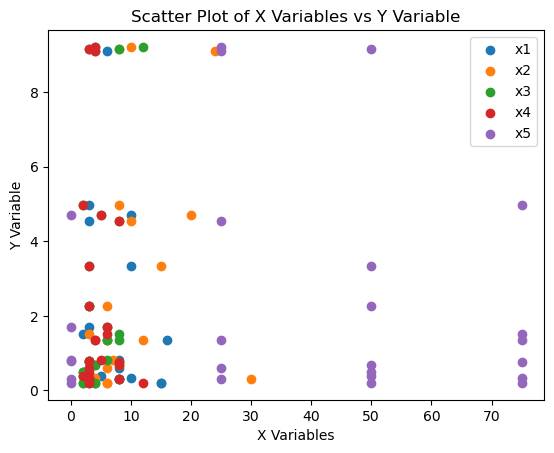

In [32]:
#visulaization
for feature in ['x1', 'x2', 'x3', 'x4', 'x5']:
    plt.scatter(data[feature], data['y'], label=feature)

plt.xlabel('X Variables')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of X Variables vs Y Variable')
plt.legend()
plt.show()

In [8]:
SS = StandardScaler()

In [9]:
transformed_data = SS.fit_transform(data)

In [10]:
transformed_data

array([[-0.84082503, -0.79756373, -0.71987403, -0.6791953 , -1.38204664,
        -0.55031704],
       [ 0.36725691,  3.13203861,  1.15479793,  1.39152208, -1.38204664,
        -0.72182675],
       [-0.84082503, -0.36094125,  0.40492914,  0.56323513, -1.38204664,
        -0.22986468],
       [-0.59920864, -0.65202291, -0.34493964,  3.04809598, -1.38204664,
        -0.75307346],
       [ 0.36725691, -0.21540042,  0.40492914,  0.14909165, -1.38204664,
        -0.54372051],
       [ 0.85048969,  1.67663033,  0.02999475,  0.14909165, -1.38204664,
         0.81273384],
       [ 0.36725691, -0.36094125, -0.71987403, -0.6791953 , -0.47280543,
        -0.61281045],
       [-0.11597587,  2.25879364, -0.34493964, -0.26505182, -0.47280543,
         2.3382676 ],
       [-0.59920864,  0.22122206,  2.6545355 , -0.26505182, -0.47280543,
         2.37402773],
       [ 2.30018802,  0.51230371,  1.15479793, -0.26505182, -0.47280543,
        -0.34964373],
       [-0.84082503,  0.22122206,  1.15479793,  1.

In [11]:
df = pd.DataFrame(transformed_data)

In [12]:
df.head()

,0,1,2,3,4,5
0,-0.840825,-0.797564,-0.719874,-0.679195,-1.382047,-0.550317
1,0.367257,3.132039,1.154798,1.391522,-1.382047,-0.721827
2,-0.840825,-0.360941,0.404929,0.563235,-1.382047,-0.229865
3,-0.599209,-0.652023,-0.344940,3.048096,-1.382047,-0.753073
4,0.367257,-0.215400,0.404929,0.149092,-1.382047,-0.543721


In [13]:
X=df.iloc[:,:5]

In [14]:
X.head()

,0,1,2,3,4
0,-0.840825,-0.797564,-0.719874,-0.679195,-1.382047
1,0.367257,3.132039,1.154798,1.391522,-1.382047
2,-0.840825,-0.360941,0.404929,0.563235,-1.382047
3,-0.599209,-0.652023,-0.344940,3.048096,-1.382047
4,0.367257,-0.215400,0.404929,0.149092,-1.382047


In [15]:
y=df.iloc[:,-1]

In [16]:
y.head()

0   -0.550317
1   -0.721827
2   -0.229865
3   -0.753073
4   -0.543721
Name: 5, dtype: float64

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.2)

In [19]:
LR=LinearRegression()

In [20]:
LR.fit(X_train,y_train)

LinearRegression()

In [34]:
LR.coef_

array([-0.37053604,  0.44235012,  0.49233469, -0.5144349 ,  0.02212615])

In [21]:
y_pred = LR.predict(X_test)

In [22]:
MSE=mean_squared_error(y_test,y_pred)

In [23]:
MSE

0.23862167395211578

In [25]:
RMSE=np.sqrt(MSE)

In [26]:
RMSE

0.4884891748566346

In [17]:
import statsmodels.api as sm

In [27]:
a=sm.OLS(y_train,X_train).fit()

In [28]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      5   R-squared (uncentered):                   0.563
Model:                            OLS   Adj. R-squared (uncentered):              0.417
Method:                 Least Squares   F-statistic:                              3.859
Date:                Wed, 21 Feb 2024   Prob (F-statistic):                      0.0190
Time:                        11:32:06   Log-Likelihood:                         -21.462
No. Observations:                  20   AIC:                                      52.92
Df Residuals:                      15   BIC:                                      57.90
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.3766      0.264     -1.424      0.175      -0.940       0.187
1              0.4434      0.205      2.158      0.048       0.006       0.881
2              0.4916      0.220      2.239      0.041       0.024       0.960
3             -0.5128      0.198     -2.592      0.020      -0.934      -0.091
4              0.0170      0.209      0.081      0.936      -0.428       0.462
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.406
Skew:                          -0.239   Prob(JB):                        0.816
Kurtosis:                       3.509   Cond. No.                         2.36
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""